## 보건자료 sas_data -> 파이썬으로 활용할 수 있겠끔 데이터정리 및 필수 자료 기초데이터분석, 정리 및 저장

In [1]:
import pandas as pd

In [12]:
aa = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2002.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
aa

,STND_Y,PERSON_ID,SEX,AGE_GROUP,DTH_YM,DTH_CODE1,DTH_CODE2,SIDO,SGG,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,DFAB_REG_YM
0,2002,10000118.0,2,16,NaN,NaN,NaN,29,29155,7,0,0,0,NaN
1,2002,10000126.0,1,1,NaN,NaN,NaN,41,41150,2,8,0,0,NaN
2,2002,10000155.0,2,16,NaN,NaN,NaN,45,45790,7,0,0,0,NaN
3,2002,10000237.0,1,1,NaN,NaN,NaN,45,45140,8,0,0,0,NaN
4,2002,10000259.0,1,1,NaN,NaN,NaN,11,11710,2,4,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025335,2002,97710560.0,2,15,NaN,NaN,NaN,45,45770,7,0,0,0,NaN
1025336,2002,97710611.0,2,17,NaN,NaN,NaN,47,47840,7,0,0,0,NaN
1025337,2002,97710680.0,1,17,NaN,NaN,NaN,11,11680,7,0,0,0,NaN
1025338,2002,97710690.0,2,6,NaN,NaN,NaN,11,11350,7,0,0,0,NaN


In [17]:
## 데이터 형태 확인
aa.shape

(1025340, 14)

In [29]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025340 entries, 0 to 1025339
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STND_Y           1025340 non-null  object 
 1   PERSON_ID        1025340 non-null  float64
 2   SEX              1025340 non-null  object 
 3   AGE_GROUP        1025340 non-null  object 
 4   DTH_YM           0 non-null        object 
 5   DTH_CODE1        0 non-null        object 
 6   DTH_CODE2        0 non-null        object 
 7   SIDO             1025340 non-null  object 
 8   SGG              1025340 non-null  object 
 9   IPSN_TYPE_CD     1025340 non-null  object 
 10  CTRB_PT_TYPE_CD  1025340 non-null  object 
 11  DFAB_GRD_CD      1025340 non-null  object 
 12  DFAB_PTN_CD      1025340 non-null  object 
 13  DFAB_REG_YM      28446 non-null    object 
dtypes: float64(1), object(13)
memory usage: 109.5+ MB


In [38]:
aa = aa.astype('float64')

In [40]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025340 entries, 0 to 1025339
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STND_Y           1025340 non-null  float64
 1   PERSON_ID        1025340 non-null  float64
 2   SEX              1025340 non-null  float64
 3   AGE_GROUP        1025340 non-null  float64
 4   DTH_YM           0 non-null        float64
 5   DTH_CODE1        0 non-null        float64
 6   DTH_CODE2        0 non-null        float64
 7   SIDO             1025340 non-null  float64
 8   SGG              1025340 non-null  float64
 9   IPSN_TYPE_CD     1025340 non-null  float64
 10  CTRB_PT_TYPE_CD  1025340 non-null  float64
 11  DFAB_GRD_CD      1025340 non-null  float64
 12  DFAB_PTN_CD      1025340 non-null  float64
 13  DFAB_REG_YM      28446 non-null    float64
dtypes: float64(14)
memory usage: 109.5 MB


In [23]:
# 죽은사람없음
print(sum(aa.DTH_YM.isna()))
print(sum(aa.DTH_CODE1.isna()))
print(sum(aa.DTH_CODE2.isna()))

1025340
1025340
1025340


In [25]:
## 시도 수
len(aa.SIDO.unique())

16

In [26]:
## 시군구 수
len(aa.SGG.unique())

244

In [48]:
## 층화표본추출을 했기 때문에 각도시별 인구수에 따라 뽑았을 것이다. 그러니 지금 확인하는 시도는 인구수에 비례하는 표본임으로 인구수의 차이로 rank된 것으로 확인하여도 된다.
aa.groupby('SIDO').count().sort_values(by=['PERSON_ID'],axis=0,ascending=False)

,STND_Y,PERSON_ID,SEX,AGE_GROUP,DTH_YM,DTH_CODE1,DTH_CODE2,SGG,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,DFAB_REG_YM
SIDO,,,,,,,,,,,,,
11.0,218005,218005,218005,218005,0,0,0,218005,218005,218005,218005,218005,4742
41.0,211154,211154,211154,211154,0,0,0,211154,211154,211154,211154,211154,5242
26.0,79386,79386,79386,79386,0,0,0,79386,79386,79386,79386,79386,1984
48.0,66081,66081,66081,66081,0,0,0,66081,66081,66081,66081,66081,1969
47.0,58224,58224,58224,58224,0,0,0,58224,58224,58224,58224,58224,1902
28.0,54532,54532,54532,54532,0,0,0,54532,54532,54532,54532,54532,1550
27.0,53683,53683,53683,53683,0,0,0,53683,53683,53683,53683,53683,1436
46.0,43500,43500,43500,43500,0,0,0,43500,43500,43500,43500,43500,1724
45.0,41235,41235,41235,41235,0,0,0,41235,41235,41235,41235,41235,1709


In [49]:
## 주신 시군구 코드랑 다름 구분할 수 없다. 이것을 통합하기 위해서는 2002년 행정구역별 코드가 필수적이다.
## 조금 찾기 힘들어보인다. 물어봐야할 듯
aa.groupby('SGG').count().sort_values(by=['PERSON_ID'],axis=0,ascending=False)

,STND_Y,PERSON_ID,SEX,AGE_GROUP,DTH_YM,DTH_CODE1,DTH_CODE2,SIDO,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,DFAB_REG_YM
SGG,,,,,,,,,,,,,
11350.0,13728,13728,13728,13728,0,0,0,13728,13728,13728,13728,13728,354
11710.0,13705,13705,13705,13705,0,0,0,13705,13705,13705,13705,13705,225
27290.0,12926,12926,12926,12926,0,0,0,12926,12926,12926,12926,12926,330
11680.0,11836,11836,11836,11836,0,0,0,11836,11836,11836,11836,11836,216
28237.0,11746,11746,11746,11746,0,0,0,11746,11746,11746,11746,11746,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47760.0,446,446,446,446,0,0,0,446,446,446,446,446,26
42790.0,434,434,434,434,0,0,0,434,434,434,434,434,27
42800.0,429,429,429,429,0,0,0,429,429,429,429,429,20


In [51]:
aa.groupby('CTRB_PT_TYPE_CD').count()

,STND_Y,PERSON_ID,SEX,AGE_GROUP,DTH_YM,DTH_CODE1,DTH_CODE2,SIDO,SGG,IPSN_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,DFAB_REG_YM
CTRB_PT_TYPE_CD,,,,,,,,,,,,,
0.0,30713,30713,30713,30713,0,0,0,30713,30713,30713,30713,30713,5452
1.0,61105,61105,61105,61105,0,0,0,61105,61105,61105,61105,61105,2620
2.0,62783,62783,62783,62783,0,0,0,62783,62783,62783,62783,62783,1929
3.0,73410,73410,73410,73410,0,0,0,73410,73410,73410,73410,73410,2308
4.0,84346,84346,84346,84346,0,0,0,84346,84346,84346,84346,84346,2194
5.0,95283,95283,95283,95283,0,0,0,95283,95283,95283,95283,95283,2257
6.0,105911,105911,105911,105911,0,0,0,105911,105911,105911,105911,105911,2245
7.0,115664,115664,115664,115664,0,0,0,115664,115664,115664,115664,115664,2190
8.0,126485,126485,126485,126485,0,0,0,126485,126485,126485,126485,126485,2274


<BarContainer object of 11 artists>

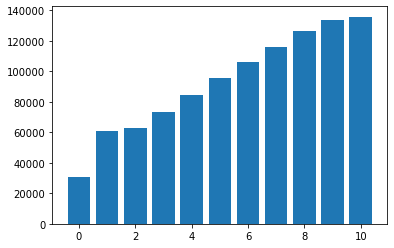

In [58]:
### 정확한 기준은 모르겠지만 소득분위에 따른 count 결과에 대한 bar plot
import matplotlib.pyplot as plt
plt.bar(aa.groupby('CTRB_PT_TYPE_CD').count()['PERSON_ID'].index, list(aa.groupby('CTRB_PT_TYPE_CD').count()['PERSON_ID']))

In [59]:
## 1급 장애와 2급장애를 확인한 결과 약 2.7만명의 장애우를 확인할 수 있다. 장애우는 조금 특별한 데이터임으로 조금 자세히 살펴보자.
aa.groupby('DFAB_GRD_CD').count()

,STND_Y,PERSON_ID,SEX,AGE_GROUP,DTH_YM,DTH_CODE1,DTH_CODE2,SIDO,SGG,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_PTN_CD,DFAB_REG_YM
DFAB_GRD_CD,,,,,,,,,,,,,
0.0,998030,998030,998030,998030,0,0,0,998030,998030,998030,998030,998030,1350
1.0,9461,9461,9461,9461,0,0,0,9461,9461,9461,9461,9461,9396
2.0,17849,17849,17849,17849,0,0,0,17849,17849,17849,17849,17849,17700


In [60]:
## 총 27310명으로 확인 가능
aa[aa.DFAB_GRD_CD>0]

,STND_Y,PERSON_ID,SEX,AGE_GROUP,DTH_YM,DTH_CODE1,DTH_CODE2,SIDO,SGG,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,DFAB_REG_YM
13,2002.0,10000727.0,1.0,1.0,NaN,NaN,NaN,42.0,42170.0,8.0,0.0,1.0,5.0,200208.0
14,2002.0,10000750.0,2.0,8.0,NaN,NaN,NaN,43.0,43111.0,7.0,0.0,2.0,2.0,200210.0
16,2002.0,10000947.0,2.0,1.0,NaN,NaN,NaN,11.0,11350.0,8.0,0.0,1.0,2.0,200112.0
25,2002.0,10001885.0,2.0,18.0,NaN,NaN,NaN,41.0,41390.0,8.0,0.0,1.0,4.0,199903.0
77,2002.0,10005865.0,2.0,1.0,NaN,NaN,NaN,45.0,45113.0,8.0,0.0,1.0,2.0,200108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025291,2002.0,96600770.0,2.0,12.0,NaN,NaN,NaN,45.0,45111.0,7.0,0.0,2.0,1.0,199608.0
1025292,2002.0,96615689.0,2.0,16.0,NaN,NaN,NaN,47.0,47850.0,7.0,0.0,1.0,1.0,199407.0
1025293,2002.0,96619263.0,2.0,15.0,NaN,NaN,NaN,47.0,47850.0,7.0,0.0,1.0,1.0,199408.0
1025297,2002.0,96703173.0,1.0,14.0,NaN,NaN,NaN,43.0,43111.0,7.0,0.0,1.0,1.0,199908.0


In [61]:
## 어느 도시에 주거를 많이할까? 조금 더 보자
jang_df = aa[aa.DFAB_GRD_CD>0]

In [65]:
jang_df = jang_df.reset_index(drop=True)

In [69]:
## 층화표본추출을 성별, 나이별, 소득수준별로 진행하였다. 장애인에 대한 것도 표본을 뽑을 때 고려한것이아닌가?
## 2002년 지역별 인구와 비슷하게 나타나는 것으로 보아 별다른 특이점을 찾을 이유가 없을 것이라고 판단된다.(2002년 기준)
jang_df.groupby('SIDO').count().sort_values(['DFAB_GRD_CD'],axis=0,ascending=False).iloc[:,1]

SIDO
41.0    5092
11.0    4529
48.0    1884
26.0    1866
47.0    1802
45.0    1649
46.0    1649
28.0    1523
44.0    1436
27.0    1351
42.0    1149
43.0    1027
29.0     754
30.0     731
31.0     512
49.0     356
Name: PERSON_ID, dtype: int64

In [70]:
## 지체장애인이 압도적으로 많다.
## 시각장애인 -> 지적장애인 -> 청각장애인 -> 뇌병변장애인 -> 신장장애인 -> 기타장애인 -> 정신장애인
jang_df.groupby('DFAB_PTN_CD').count().sort_values(['DFAB_GRD_CD'],axis=0,ascending=False).iloc[:,1]

DFAB_PTN_CD
1.0    15980
3.0     2765
5.0     2372
4.0     2338
2.0     2066
7.0      637
8.0      593
6.0      559
Name: PERSON_ID, dtype: int64

In [76]:
from tqdm.notebook import tqdm


In [138]:
## 새로운 표본이 들어오고 나오는 것을 확인해보자.
year = ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
id_data = pd.DataFrame()
for i in tqdm(year):
    a = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_' + i + '.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
    id_data = pd.concat([id_data,pd.DataFrame(a.PERSON_ID)],axis=1)

In [144]:
year = ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
id_data.columns=year

In [145]:
ohmygod = id_data.copy()
id_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025340 entries, 0 to 1025339
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   2002    1025340 non-null  float64
 1   2003    1017468 non-null  float64
 2   2004    1016580 non-null  float64
 3   2005    1016820 non-null  float64
 4   2006    1002005 non-null  float64
 5   2007    1020743 non-null  float64
 6   2008    1000785 non-null  float64
 7   2009    998527 non-null   float64
 8   2010    1002031 non-null  float64
 9   2011    1006481 non-null  float64
 10  2012    1011123 non-null  float64
 11  2013    1014730 non-null  float64
dtypes: float64(12)
memory usage: 93.9 MB


In [146]:
id_data['2003']

0          10000118.0
1          10000126.0
2          10000155.0
3          10000237.0
4          10000259.0
              ...    
1025335           NaN
1025336           NaN
1025337           NaN
1025338           NaN
1025339           NaN
Name: 2003, Length: 1025340, dtype: float64

In [147]:
id_data

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0,10000118.0
1,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0,10000126.0
2,10000155.0,10000155.0,10000155.0,10000155.0,10000155.0,10000155.0,10000155.0,10000155.0,10000155.0,10000155.0,10000155.0,10000237.0
3,10000237.0,10000237.0,10000237.0,10000237.0,10000237.0,10000237.0,10000237.0,10000237.0,10000237.0,10000237.0,10000237.0,10000259.0
4,10000259.0,10000259.0,10000259.0,10000259.0,10000259.0,10000259.0,10000259.0,10000259.0,10000259.0,10000259.0,10000259.0,10000345.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1025335,97710560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025336,97710611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025337,97710680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025338,97710690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
len(set(id_data[id_data[year[1]].isna()==False]['2003']) - set(id_data[year[0]]))

9437

In [149]:
len(set(id_data[id_data[year[1]].isna()==False]['2003']).intersection(set(id_data[year[0]])))

1008031

In [150]:
len(set(id_data[year[0]]) - set(id_data[id_data[year[1]].isna()==False]['2003']))

17309

In [151]:
tt = set()
for i in year:
    tt = tt | set(id_data[id_data[i].isna()==False][i])

In [166]:
a = (id_data == 97710560.0).sum()

In [179]:
b = pd.DataFrame(a).T
b.index = [97710560.0]

In [181]:
c = pd.DataFrame()
c = pd.concat([c,b])
c

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
97710560.0,1,1,1,1,0,0,0,0,0,0,0,0


In [184]:
c = pd.DataFrame()
for i in tqdm(tt):
    a = (id_data == i).sum()
    b = pd.DataFrame(a).T
    b.index = [i]
    c = pd.concat([c,b])

In [238]:
lst = []
for i in tqdm(range(c.shape[0])):
    check1 = c.iloc[i,:][c.iloc[i,:]==0].index
    check2 = c.iloc[i,:][c.iloc[i,:]==1].index
    check1 = np.array(list(map(int,check1)))
    check2 = np.array(list(map(int,check2)))
    if len(check1) == 0:
        lst.append(1)
    else:
        if (np.sum(check2<np.max(check1)) > 0) & (np.sum(check2>np.max(check1)) > 0):
            lst.append(0)
        else:
            lst.append(1)

In [241]:
c['다시들어간 사람'] = lst

In [245]:
c['포함되는 연도수'] = np.sum(c.iloc[:,:12],axis=1)

In [248]:
c.to_csv('개인식별번호 연결성확인.csv')

### 과제 해결 코드

## 1.2002년 기준 2003년~2013년 까지 경상남도에 새로 전입된 사람수와 전출된 사람수는?

In [9]:
df_2002 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2002.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2003 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2003.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2004 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2004.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2005 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2005.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2006 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2006.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2007 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2007.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2008 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2008.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2009 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2009.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2010 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2010.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2011 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2011.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2012 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2012.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
df_2013 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2013.sas7bdat',format='sas7bdat',encoding='iso-8859-1')

In [265]:
print(len(set(df_2003[df_2003.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2004[df_2004.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2005[df_2005.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2006[df_2006.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2007[df_2007.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2008[df_2008.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2009[df_2009.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2010[df_2010.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2011[df_2011.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2012[df_2012.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))
print(len(set(df_2013[df_2013.SIDO == '48'].PERSON_ID) - set(df_2002[df_2002.SIDO == '48'].PERSON_ID)))

2906
4867
6587
7958
10896
12041
13258
13069
14206
15205
16423


In [266]:
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2003[df_2003.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2004[df_2004.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2005[df_2005.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2006[df_2006.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2007[df_2007.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2008[df_2008.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2009[df_2009.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2010[df_2010.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2011[df_2011.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2012[df_2012.SIDO == '48'].PERSON_ID)))
print(len(set(df_2002[df_2002.SIDO == '48'].PERSON_ID) - set(df_2013[df_2013.SIDO == '48'].PERSON_ID)))

3135
5251
6939
9240
11781
14353
15541
14000
14647
15498
16405


## 2. 2002년 기준 2003년~2013년 까지 진주시에 새로 전입된 사람수와 전출된 사람수는?

In [304]:
print(len(set(df_2003[df_2003.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2004[df_2004.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2005[df_2005.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2006[df_2006.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2007[df_2007.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2008[df_2008.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2009[df_2009.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2010[df_2010.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2011[df_2011.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2012[df_2012.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))
print(len(set(df_2013[df_2013.SGG == '48170'].PERSON_ID) - set(df_2002[df_2002.SGG == '48170'].PERSON_ID)))

397
687
882
1022
1286
1329
1413
1416
1547
1682
1779


In [305]:
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2003[df_2003.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2004[df_2004.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2005[df_2005.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2006[df_2006.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2007[df_2007.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2008[df_2008.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2009[df_2009.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2010[df_2010.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2011[df_2011.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2012[df_2012.SGG == '48170'].PERSON_ID)))
print(len(set(df_2002[df_2002.SGG == '48170'].PERSON_ID) - set(df_2013[df_2013.SGG == '48170'].PERSON_ID)))

478
758
1013
1292
1818
2235
2328
2079
2200
2257
2390


## 3. 2002~2013년 진주시 성별에 따른 당뇨유병자 수는 (주성상병 및 부상병 기준 E10 ~E14)(참고 주상병 E101, E102 등도 포함하게 만드시오)

In [306]:
di_2002 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2002.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2003 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2003.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2004 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2004.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2005 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2005.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2006 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2006.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2007 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2007.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2008 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2008.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2009 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2009.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2010 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2010.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2011 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2011.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2012 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2012.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
di_2013 = pd.read_sas('D:\\코호트자료\\표본코호트\\04.상병내역_T140_S\\nhid_gy40_t1_2013.sas7bdat',format='sas7bdat',encoding='iso-8859-1')


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 

KeyboardInterrupt

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.read_next_page'
Traceback (most recent call last):
  File "C:\Users\a3011\anaconda3\lib\site-packages\pandas\io\sas\sas7bdat.py", line 701, in _read_next_page
    def _read_next_page(self):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas.io.sas._sas.Parser.process_byte_array_with_data'
Traceback (most recent call last):
  File "pandas\io\sas\sas.pyx", line 113, in pandas.io.sas._sas.rle_decompress
  File "C:\Users\a3011\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, in asarray
    @set_module('numpy')
KeyboardInterrupt: 


ValueError: Length of values (16490000) does not match length of index (16489980)

In [2]:
import numpy as np

In [3]:
df_2002 = pd.read_sas('D:\\코호트자료\\표본코호트\\01.자격\\nhid_jk_2002.sas7bdat',format='sas7bdat',encoding='iso-8859-1')


KeyboardInterrupt: 

In [5]:
di_2002 = pd.read_sas('D:\\코호트자료\\표본코호트\\02.명세서_T120\\nhid_gy20_t1_2002.sas7bdat',format='sas7bdat',encoding='iso-8859-1')

In [55]:
men_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '1')].PERSON_ID)
women_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '2')].PERSON_ID)

In [56]:
jinju_men_2002 = di_2002[di_2002.PERSON_ID.isin(men_nickname)]
jinju_women_2002 = di_2002[di_2002.PERSON_ID.isin(women_nickname)]

In [57]:
len(set(jinju_men_2002[jinju_men_2002.MAIN_SICK.isin(['E10','E11','E12','E13','E14','E101','E102'])].PERSON_ID).union(set(jinju_men_2002[jinju_men_2002.SUB_SICK.isin(['E10','E11','E12','E13','E14','E101','E102'])].PERSON_ID)))

44

In [58]:
len(set(jinju_women_2002[jinju_women_2002.MAIN_SICK.isin(['E10','E11','E12','E13','E14','E101','E102'])].PERSON_ID).union(set(jinju_women_2002[jinju_women_2002.SUB_SICK.isin(['E10','E11','E12','E13','E14','E101','E102'])].PERSON_ID)))

67

In [62]:
di_2002[['PERSON_ID','MAIN_SICK','SUB_SICK']]

,PERSON_ID,MAIN_SICK,SUB_SICK
0,10000126.0,L20,NaN
1,10000126.0,H10,NaN
2,10000126.0,S700,J069
3,10000126.0,J039,NaN
4,10000126.0,J039,J069
...,...,...,...
5547274,94386613.0,J00,NaN
5547275,94395473.0,J00,NaN
5547276,94395473.0,J00,NaN
5547277,94443760.0,G809,M130


In [2]:
from tqdm.notebook import tqdm
import numpy as np

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
for i in tqdm(['2010','2011','2012','2013']):
    pd.read_sas('D:\\코호트자료\\표본코호트\\02.명세서_T120\\nhid_gy20_t1_' + i + '.sas7bdat',format='sas7bdat',encoding='iso-8859-1')[['PERSON_ID','MAIN_SICK','SUB_SICK','RECU_FR_DT']].to_csv('patient_' + i + '.csv')

In [7]:
pd.read_csv('diabets_2002.csv',index_col=0)

C:\Users\a3011\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,PERSON_ID,MAIN_SICK,SUB_SICK
0,10000126.0,L20,NaN
1,10000126.0,H10,NaN
2,10000126.0,S700,J069
3,10000126.0,J039,NaN
4,10000126.0,J039,J069
...,...,...,...
5547274,94386613.0,J00,NaN
5547275,94395473.0,J00,NaN
5547276,94395473.0,J00,NaN
5547277,94443760.0,G809,M130


In [ ]:
men_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '1')].PERSON_ID)
women_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '2')].PERSON_ID)

In [42]:
for i in ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']:
    if i == '2002':
        men_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '2')].PERSON_ID)
    elif i == '2003':
        men_nickname = set(df_2003[(df_2003.SGG=='48170') & (df_2003.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2003[(df_2003.SGG=='48170') & (df_2003.SEX == '2')].PERSON_ID)
    elif i == '2004':
        men_nickname = set(df_2004[(df_2004.SGG=='48170') & (df_2004.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2004[(df_2004.SGG=='48170') & (df_2004.SEX == '2')].PERSON_ID)
    elif i == '2005':
        men_nickname = set(df_2005[(df_2005.SGG=='48170') & (df_2005.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2005[(df_2005.SGG=='48170') & (df_2005.SEX == '2')].PERSON_ID)
    elif i == '2006':
        men_nickname = set(df_2006[(df_2006.SGG=='48170') & (df_2006.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2006[(df_2006.SGG=='48170') & (df_2006.SEX == '2')].PERSON_ID)
    elif i == '2007':
        men_nickname = set(df_2007[(df_2007.SGG=='48170') & (df_2007.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2007[(df_2007.SGG=='48170') & (df_2007.SEX == '2')].PERSON_ID)
    elif i == '2008':
        men_nickname = set(df_2008[(df_2008.SGG=='48170') & (df_2008.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2008[(df_2008.SGG=='48170') & (df_2008.SEX == '2')].PERSON_ID)
    elif i == '2009':
        men_nickname = set(df_2009[(df_2009.SGG=='48170') & (df_2009.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2009[(df_2009.SGG=='48170') & (df_2009.SEX == '2')].PERSON_ID)
    elif i == '2010':
        men_nickname = set(df_2010[(df_2010.SGG=='48170') & (df_2010.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2010[(df_2010.SGG=='48170') & (df_2010.SEX == '2')].PERSON_ID)
    elif i == '2011':
        men_nickname = set(df_2011[(df_2011.SGG=='48170') & (df_2011.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2011[(df_2011.SGG=='48170') & (df_2011.SEX == '2')].PERSON_ID)
    elif i == '2012':
        men_nickname = set(df_2012[(df_2012.SGG=='48170') & (df_2012.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2012[(df_2012.SGG=='48170') & (df_2012.SEX == '2')].PERSON_ID)
    elif i == '2013':
        men_nickname = set(df_2013[(df_2013.SGG=='48170') & (df_2013.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2013[(df_2013.SGG=='48170') & (df_2013.SEX == '2')].PERSON_ID)
    else:
        pass
        
        
    abc = pd.read_csv('diabets_'+i+'.csv',index_col=0)
    jinju_men = abc[abc.PERSON_ID.isin(men_nickname)]
    jinju_women = abc[abc.PERSON_ID.isin(women_nickname)]
    print(i)
    print('남',len(set(jinju_men[jinju_men.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_men[jinju_men.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID))))
    print('여',len(set(jinju_women[jinju_women.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_women[jinju_women.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID))))

C:\Users\a3011\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


2002
남 80
여 89
2003
남 101
여 117
2004
남 122
여 119
2005
남 144
여 144
2006
남 134
여 124
2007
남 139
여 136
2008
남 119
여 130
2009
남 157
여 141
2010
남 174
여 149
2011
남 211
여 194
2012
남 213
여 202
2013
남 227
여 214


In [37]:
list(jinju_men.MAIN_SICK.unique())

['M7920',
 'S610',
 'K297',
 'L509',
 'J00',
 'H9328',
 'I219',
 'M5420',
 'M5422',
 'B022',
 'B009',
 'B351',
 'K210',
 'M510',
 'E1378',
 'J189',
 'J209',
 'G470',
 'K291',
 'L303',
 'M130',
 'K732',
 'I109',
 'L050',
 'J450',
 'I2080',
 'A493',
 'L0310',
 'I872',
 'L209',
 'N309',
 'M1380',
 'I5000',
 'M171',
 'M79100',
 'E790',
 'H6054',
 'L039',
 'M750',
 'H1629',
 'M4802',
 'M5429',
 'M5459',
 'J219',
 'I100',
 'J440',
 'J040',
 'I209',
 'I638',
 'M751',
 'H192',
 'T151',
 'S134',
 'H101',
 'K529',
 'M511',
 'J0100',
 'L238',
 'K8030',
 'K8031',
 'K741',
 'R100',
 'T250',
 'S42090',
 'S011',
 'S010',
 'S22430',
 'S901',
 'M1391',
 'R1049',
 'R042',
 'B909',
 'M512',
 'M502',
 'M4782',
 'H0411',
 'M0589',
 'M0587',
 'D509',
 'C1699',
 'M654',
 'M1386',
 'K700',
 'J042',
 'M79108',
 'J342',
 'M501',
 'J304',
 'J320',
 'L239',
 'J303',
 'L0232',
 'S935',
 'S8341',
 'H520',
 'M79198',
 'B353',
 'L248',
 'M759',
 'T634',
 'G479',
 'S9348',
 'H6008',
 'S911',
 'M7088',
 'Q871',
 'J300'

In [24]:
abc

,PERSON_ID,MAIN_SICK,SUB_SICK
0,10000118.0,B86,K296
1,10000118.0,B86,K296
2,10000118.0,S72080,S32020
3,10000118.0,M1395,S72090
4,10000118.0,S720,NaN
...,...,...,...
14526177,99998042.0,P599,NaN
14526178,99998042.0,P599,NaN
14526179,99998042.0,P599,NaN
14526180,99998362.0,Z380,NaN


In [44]:
setset_men = set()
setset_women = set()
for i in ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']:
    if i == '2002':
        men_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2002[(df_2002.SGG=='48170') & (df_2002.SEX == '2')].PERSON_ID)
    elif i == '2003':
        men_nickname = set(df_2003[(df_2003.SGG=='48170') & (df_2003.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2003[(df_2003.SGG=='48170') & (df_2003.SEX == '2')].PERSON_ID)
    elif i == '2004':
        men_nickname = set(df_2004[(df_2004.SGG=='48170') & (df_2004.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2004[(df_2004.SGG=='48170') & (df_2004.SEX == '2')].PERSON_ID)
    elif i == '2005':
        men_nickname = set(df_2005[(df_2005.SGG=='48170') & (df_2005.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2005[(df_2005.SGG=='48170') & (df_2005.SEX == '2')].PERSON_ID)
    elif i == '2006':
        men_nickname = set(df_2006[(df_2006.SGG=='48170') & (df_2006.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2006[(df_2006.SGG=='48170') & (df_2006.SEX == '2')].PERSON_ID)
    elif i == '2007':
        men_nickname = set(df_2007[(df_2007.SGG=='48170') & (df_2007.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2007[(df_2007.SGG=='48170') & (df_2007.SEX == '2')].PERSON_ID)
    elif i == '2008':
        men_nickname = set(df_2008[(df_2008.SGG=='48170') & (df_2008.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2008[(df_2008.SGG=='48170') & (df_2008.SEX == '2')].PERSON_ID)
    elif i == '2009':
        men_nickname = set(df_2009[(df_2009.SGG=='48170') & (df_2009.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2009[(df_2009.SGG=='48170') & (df_2009.SEX == '2')].PERSON_ID)
    elif i == '2010':
        men_nickname = set(df_2010[(df_2010.SGG=='48170') & (df_2010.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2010[(df_2010.SGG=='48170') & (df_2010.SEX == '2')].PERSON_ID)
    elif i == '2011':
        men_nickname = set(df_2011[(df_2011.SGG=='48170') & (df_2011.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2011[(df_2011.SGG=='48170') & (df_2011.SEX == '2')].PERSON_ID)
    elif i == '2012':
        men_nickname = set(df_2012[(df_2012.SGG=='48170') & (df_2012.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2012[(df_2012.SGG=='48170') & (df_2012.SEX == '2')].PERSON_ID)
    elif i == '2013':
        men_nickname = set(df_2013[(df_2013.SGG=='48170') & (df_2013.SEX == '1')].PERSON_ID)
        women_nickname = set(df_2013[(df_2013.SGG=='48170') & (df_2013.SEX == '2')].PERSON_ID)
    else:
        pass
    
    
    abc = pd.read_csv('diabets_'+i+'.csv',index_col=0)
    jinju_men = abc[abc.PERSON_ID.isin(men_nickname)]
    jinju_women = abc[abc.PERSON_ID.isin(women_nickname)]
    print(i)
    print('남',len(set(jinju_men[jinju_men.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_men[jinju_men.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID))))
    print('여',len(set(jinju_women[jinju_women.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_women[jinju_women.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID))))
    print(i,'신규 당뇨병환자 확인 ')
    print('남',len(set(jinju_men[jinju_men.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_men[jinju_men.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID))-
                 setset_men))
    print('여',len(set(jinju_women[jinju_women.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_women[jinju_women.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID))-
                 setset_women))
    setset_men = setset_men.union(set(jinju_men[jinju_men.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_men[jinju_men.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID)))
    setset_women = setset_women.union(set(jinju_women[jinju_women.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_women[jinju_women.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID)))

2002
남 80
여 89
2002 신규 당뇨병환자 확인 
남 80
여 89
2003
남 101
여 117
2003 신규 당뇨병환자 확인 
남 48
여 55
2004
남 122
여 119
2004 신규 당뇨병환자 확인 
남 47
여 39
2005
남 144
여 144
2005 신규 당뇨병환자 확인 
남 39
여 49
2006
남 134
여 124
2006 신규 당뇨병환자 확인 
남 31
여 32
2007
남 139
여 136
2007 신규 당뇨병환자 확인 
남 50
여 57
2008
남 119
여 130
2008 신규 당뇨병환자 확인 
남 20
여 44
2009
남 157
여 141
2009 신규 당뇨병환자 확인 
남 42
여 32
2010
남 174
여 149
2010 신규 당뇨병환자 확인 
남 36
여 35
2011
남 211
여 194
2011 신규 당뇨병환자 확인 
남 52
여 47
2012
남 213
여 202
2012 신규 당뇨병환자 확인 
남 43
여 41
2013
남 227
여 214
2013 신규 당뇨병환자 확인 
남 38
여 40


In [41]:
len(set(jinju_men[jinju_men.MAIN_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID).union(set(jinju_men[jinju_men.SUB_SICK.str[:3].isin(['E10','E11','E12','E13','E14'])].PERSON_ID)))

227

In [23]:
setset_men = set()
setset_men

set()

In [45]:

for i in tqdm(['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']):
    pd.read_sas('D:\\코호트자료\\표본코호트\\02.명세서_T120\\nhid_gy20_t1_' + i + '.sas7bdat',format='sas7bdat',encoding='iso-8859-1')[['PERSON_ID','KEY_SEQ','YKIHO_ID','RECU_FR_DT']].to_csv('keynumber_' + i + '.csv')

In [62]:
yoyang_df = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2002.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang = yoyang_df[['YKIHO_ID','YKIHO_SIDO']]

In [68]:
count_key = pd.merge(key1,yoyang,how='left',on='YKIHO_ID')

In [85]:
a2002 = set(df_2002[df_2002.SIDO=='48'].PERSON_ID)
a2003 = set(df_2003[df_2003.SIDO=='48'].PERSON_ID)
a2004 = set(df_2004[df_2004.SIDO=='48'].PERSON_ID)
a2005 = set(df_2005[df_2005.SIDO=='48'].PERSON_ID)
a2006 = set(df_2006[df_2006.SIDO=='48'].PERSON_ID)
a2007 = set(df_2007[df_2007.SIDO=='48'].PERSON_ID)
a2008 = set(df_2008[df_2008.SIDO=='48'].PERSON_ID)
a2009 = set(df_2009[df_2009.SIDO=='48'].PERSON_ID)
a2010 = set(df_2010[df_2010.SIDO=='48'].PERSON_ID)
a2011 = set(df_2011[df_2011.SIDO=='48'].PERSON_ID)
a2012 = set(df_2012[df_2012.SIDO=='48'].PERSON_ID)
a2013 = set(df_2013[df_2013.SIDO=='48'].PERSON_ID)

In [86]:
key_df2002 = pd.read_csv('keynumber_2002.csv',index_col=0)
key_df2003 = pd.read_csv('keynumber_2003.csv',index_col=0)
key_df2004 = pd.read_csv('keynumber_2004.csv',index_col=0)
key_df2005 = pd.read_csv('keynumber_2005.csv',index_col=0)
key_df2006 = pd.read_csv('keynumber_2006.csv',index_col=0)
key_df2007 = pd.read_csv('keynumber_2007.csv',index_col=0)
key_df2008 = pd.read_csv('keynumber_2008.csv',index_col=0)
key_df2009 = pd.read_csv('keynumber_2009.csv',index_col=0)
key_df2010 = pd.read_csv('keynumber_2010.csv',index_col=0)
key_df2011 = pd.read_csv('keynumber_2011.csv',index_col=0)
key_df2012 = pd.read_csv('keynumber_2012.csv',index_col=0)
key_df2013 = pd.read_csv('keynumber_2013.csv',index_col=0)

C:\Users\a3011\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [87]:
key2002 = key_df2002[key_df2002.PERSON_ID.isin(a2002)][['PERSON_ID','YKIHO_ID']]
key2003 = key_df2003[key_df2003.PERSON_ID.isin(a2003)][['PERSON_ID','YKIHO_ID']]
key2004 = key_df2004[key_df2004.PERSON_ID.isin(a2004)][['PERSON_ID','YKIHO_ID']]
key2005 = key_df2005[key_df2005.PERSON_ID.isin(a2005)][['PERSON_ID','YKIHO_ID']]
key2006 = key_df2006[key_df2006.PERSON_ID.isin(a2006)][['PERSON_ID','YKIHO_ID']]
key2007 = key_df2007[key_df2007.PERSON_ID.isin(a2007)][['PERSON_ID','YKIHO_ID']]
key2008 = key_df2008[key_df2008.PERSON_ID.isin(a2008)][['PERSON_ID','YKIHO_ID']]
key2009 = key_df2009[key_df2009.PERSON_ID.isin(a2009)][['PERSON_ID','YKIHO_ID']]
key2010 = key_df2010[key_df2010.PERSON_ID.isin(a2010)][['PERSON_ID','YKIHO_ID']]
key2011 = key_df2011[key_df2011.PERSON_ID.isin(a2011)][['PERSON_ID','YKIHO_ID']]
key2012 = key_df2012[key_df2012.PERSON_ID.isin(a2012)][['PERSON_ID','YKIHO_ID']]
key2013 = key_df2013[key_df2013.PERSON_ID.isin(a2013)][['PERSON_ID','YKIHO_ID']]

In [88]:
yoyang2002 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2002.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2003 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2003.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2004 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2004.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2005 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2005.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2006 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2006.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2007 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2007.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2008 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2008.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2009 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2009.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2010 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2010.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2011 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2011.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2012 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2012.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2013 = pd.read_sas('D:\\코호트자료\\표본코호트\\13.요양기관_S\\nhid_yk_2013.sas7bdat',format='sas7bdat',encoding='iso-8859-1')
yoyang2002 = yoyang2002[['YKIHO_ID','YKIHO_SIDO']]
yoyang2003 = yoyang2003[['YKIHO_ID','YKIHO_SIDO']]
yoyang2004 = yoyang2004[['YKIHO_ID','YKIHO_SIDO']]
yoyang2005 = yoyang2005[['YKIHO_ID','YKIHO_SIDO']]
yoyang2006 = yoyang2006[['YKIHO_ID','YKIHO_SIDO']]
yoyang2007 = yoyang2007[['YKIHO_ID','YKIHO_SIDO']]
yoyang2008 = yoyang2008[['YKIHO_ID','YKIHO_SIDO']]
yoyang2009 = yoyang2009[['YKIHO_ID','YKIHO_SIDO']]
yoyang2010 = yoyang2010[['YKIHO_ID','YKIHO_SIDO']]
yoyang2011 = yoyang2011[['YKIHO_ID','YKIHO_SIDO']]
yoyang2012 = yoyang2012[['YKIHO_ID','YKIHO_SIDO']]
yoyang2013 = yoyang2013[['YKIHO_ID','YKIHO_SIDO']]

In [89]:
count_key2002 = pd.merge(key2002,yoyang2002,how='left',on='YKIHO_ID')
count_key2003 = pd.merge(key2003,yoyang2003,how='left',on='YKIHO_ID')
count_key2004 = pd.merge(key2004,yoyang2004,how='left',on='YKIHO_ID')
count_key2005 = pd.merge(key2005,yoyang2005,how='left',on='YKIHO_ID')
count_key2006 = pd.merge(key2006,yoyang2006,how='left',on='YKIHO_ID')
count_key2007 = pd.merge(key2007,yoyang2007,how='left',on='YKIHO_ID')
count_key2008 = pd.merge(key2008,yoyang2008,how='left',on='YKIHO_ID')
count_key2009 = pd.merge(key2009,yoyang2009,how='left',on='YKIHO_ID')
count_key2010 = pd.merge(key2010,yoyang2010,how='left',on='YKIHO_ID')
count_key2011 = pd.merge(key2011,yoyang2011,how='left',on='YKIHO_ID')
count_key2012 = pd.merge(key2012,yoyang2012,how='left',on='YKIHO_ID')
count_key2013 = pd.merge(key2013,yoyang2013,how='left',on='YKIHO_ID')

In [101]:
count_out = []
count_in = []
for i in tqdm(a2013):
    countmachine = count_key2013[count_key2013.PERSON_ID == i]['YKIHO_SIDO'].unique()
    if np.sum(countmachine != '48') >=1:
        count_out.append(1)
    else:
        count_out.append(0)
        
    if np.sum(countmachine == '48') >=1:
        count_in.append(1)
    else:
        count_in.append(0)
print(np.sum(count_in))
print(np.sum(count_out))



57084
16061


In [116]:
count_guo = []
for i in tqdm(a2013):
    countmachine = count_key2013[count_key2013.PERSON_ID == i]['YKIHO_SIDO'].unique()
    if (np.sum(countmachine != '48') >=1) & (np.sum(countmachine == '48') >=1):
        count_guo.append(1)
print(np.sum(count_guo))


13080


In [130]:
print(np.sum(count_key2013.YKIHO_SIDO == '48'))
print(np.sum(count_key2013.YKIHO_SIDO != '48'))

870507
107703


In [79]:
len(a5)

66081